In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
imgs_path = '/content/drive/MyDrive/exit test'
imgs_model_width, imgs_model_height = 224, 224

In [15]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=3 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [16]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [17]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/exit test/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )
train_data.class_indices

Found 16 images belonging to 3 classes.


{'goal': 0, 'happy': 1, 'loss': 2}

In [18]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/exit test/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 10 images belonging to 3 classes.


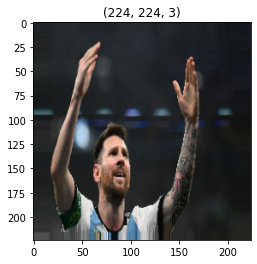

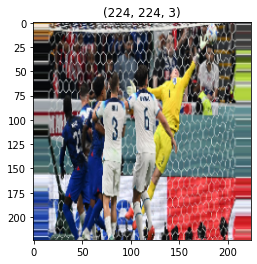

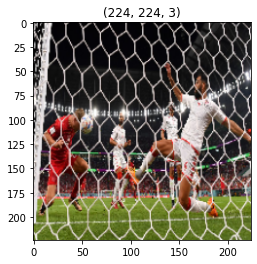

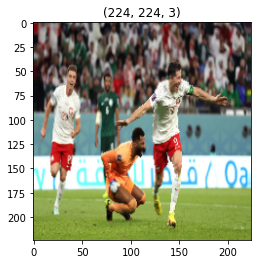

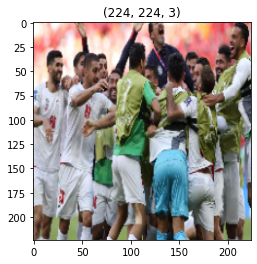

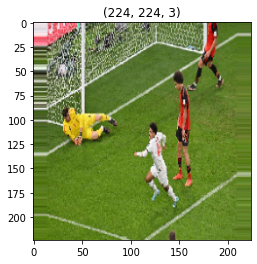

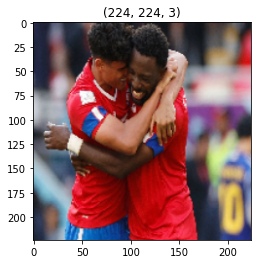

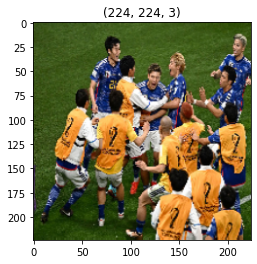

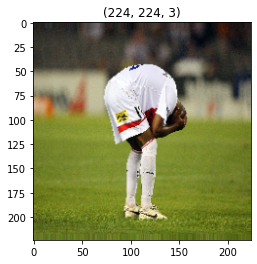

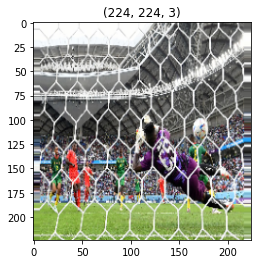

In [19]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

In [20]:
pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]
print(str(es))

In [34]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 50, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])
     

<ipython-input-34-a91b518cf0a8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/50
 1/10 [==>...........................] - ETA: 10s - loss: 0.0579 - accuracy: 1.0000


Epoch 1: val_accuracy improved from 0.60000 to 0.90000, saving model to best_model.h5
10/10 [==============================] - 2s 112ms/step - loss: 0.0579 - accuracy: 1.0000 - val_loss: 1.0613 - val_accuracy: 0.9000


In [35]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [36]:
op

{0: 'goal', 1: 'happy', 2: 'loss'}

1/1 [==============================] - 0s 67ms/step
 the image is of happy


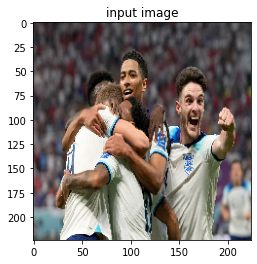

In [38]:
# path for the image to see if it predics correct class

path = "/content/drive/MyDrive/exit test/test/happy/24.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()